In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

audio_path = "/content/drive/MyDrive/audio project PSD/Ed Sheeran Shape of You.mp3"
print(os.path.exists(audio_path))

True


1. convert MP3 ke WAV

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment

mp3 = AudioSegment.from_mp3(audio_path)
wav_path = "/content/drive/MyDrive/audio project PSD/ShapeOfYou.wav"
mp3.export(wav_path, format="wav")

print(wav_path)

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


/content/drive/MyDrive/audio project PSD/ShapeOfYou.wav


2. Memangkas Audio yang akan Dipakai

In [ ]:
import soundfile as sf
import os

input_wav = "/content/drive/MyDrive/audio project PSD/ShapeOfYou.wav"
output_wav = "/content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav"

y, sr = sf.read(input_wav)

start_sec = 5
dur_sec   = 240
start = int(start_sec * sr)
end   = int((start_sec + dur_sec) * sr)

clip = y[start:end]

sf.write(output_wav, clip, sr)

print()
print(output_wav)

print(os.path.exists(output_wav))


/content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav
True


FILTERING

In [ ]:
import numpy as np
import soundfile as sf
from scipy.signal import butter, cheby1, firwin, filtfilt
from IPython.display import Audio

input_audio = "/content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav"
y, sr = sf.read(input_audio)

print(input_audio)
print("Sample rate:", sr)
print("Duration:", len(y)/sr, "seconds")

Audio(input_audio)

FILTER 1 - BUTTERWORTH

In [ ]:
low = 40
high = 250
low_norm = low / (sr/2)
high_norm = high / (sr/2)

b_butt, a_butt = butter(2, [low_norm, high_norm], btype='band')

# ZERO-PADDING
# Get the number of channels from y
num_channels = y.shape[1] if y.ndim > 1 else 1
y_pad = np.concatenate([np.zeros((5000, num_channels)), y, np.zeros((5000, num_channels))])
y_butter_pad = filtfilt(b_butt, a_butt, y_pad, axis=0)
y_butter = y_butter_pad[5000:-5000]

sf.write("butter_fixed.wav", y_butter, sr)
Audio("butter_fixed.wav")

FILTER 2 - FIR

In [ ]:
low = 40
high = 250

# FIR kernel
numtaps = 401

fir_coeff = firwin(
    numtaps=numtaps,
    cutoff=[low, high],
    fs=sr,
    pass_zero=False,
    window="hamming"
)

# ZERO PADDING
# Get the number of channels from y
num_channels = y.shape[1] if y.ndim > 1 else 1
y_pad = np.concatenate([np.zeros((5000, num_channels)), y, np.zeros((5000, num_channels))])
y_fir_pad = filtfilt(fir_coeff, [1.0], y_pad, axis=0)
y_fir = y_fir_pad[5000:-5000]

sf.write("fir_fixed.wav", y_fir, sr)
Audio("fir_fixed.wav")

FILTER 3 — CHEBYSHEV TYPE-I

In [ ]:
low_norm = low / (sr/2)
high_norm = high / (sr/2)

# Order rendah & ripple kecil
b_cheb, a_cheb = cheby1(
    N=3,
    rp=0.5,
    Wn=[low_norm, high_norm],
    btype='band'
)

# ZERO-PADDING
# Get the number of channels from y
num_channels = y.shape[1] if y.ndim > 1 else 1
y_pad = np.concatenate([np.zeros((5000, num_channels)), y, np.zeros((5000, num_channels))])
y_cheb_pad = filtfilt(b_cheb, a_cheb, y_pad, axis=0)
y_cheb = y_cheb_pad[5000:-5000]

sf.write("cheb_fixed.wav", y_cheb, sr)
Audio("cheb_fixed.wav")

membesarkan volume

In [ ]:
import numpy as np
import soundfile as sf

In [ ]:
gain = 2.0
def amplify(signal, gain):
    # perbesar volume
    boosted = signal * gain
    # cegah clipping (nilai > 1 atau < -1)
    boosted = np.clip(boosted, -1.0, 1.0)
    return boosted


In [ ]:
y_butter_amp = amplify(y_butter, gain)
y_fir_amp    = amplify(y_fir, gain)
y_cheb_amp   = amplify(y_cheb, gain)

In [ ]:
sf.write("butter_louder.wav", y_butter_amp, sr)
sf.write("fir_louder.wav",    y_fir_amp,    sr)
sf.write("cheb_louder.wav",   y_cheb_amp,   sr)

print("Butterworth:")
display(Audio("butter_louder.wav"))

print("FIR:")
display(Audio("fir_louder.wav"))

print("Chebyshev:")
display(Audio("cheb_louder.wav"))

VISUALISASI

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.fft import rfft, rfftfreq
from IPython.display import Audio

SOUND ORI TANPA FILTER

FFT

In [ ]:
def plot_fft(signal, sr, title="FFT"):
    N = len(signal)
    f = rfftfreq(N, 1/sr)
    X = np.abs(rfft(signal))

    plt.figure(figsize=(12,4))
    plt.plot(f, X)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

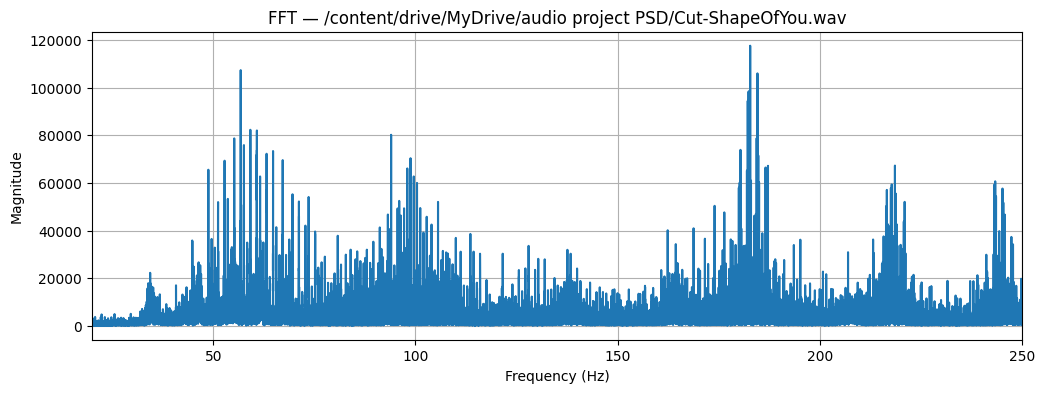

In [ ]:
plot_fft(y[:, 0], sr, "FFT — /content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav")

WELCH

In [ ]:
def plot_psd(signal, sr, title="PSD (Welch)"):
    f, Pxx = welch(signal, sr, nperseg=2048)

    plt.figure(figsize=(12,4))
    plt.semilogy(f, Pxx)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.show()

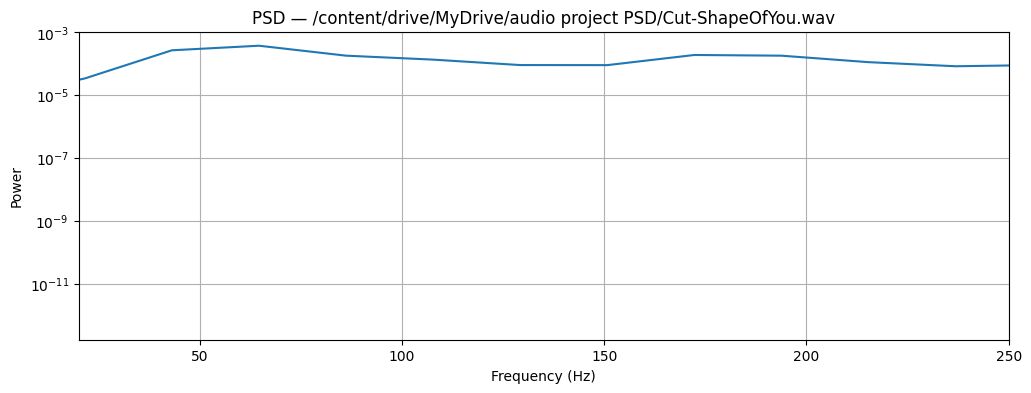

In [ ]:
plot_psd(y[:, 0], sr, "PSD — /content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav")

TIME DOMAIN

In [ ]:
def plot_time(signal, title="Time Domain"):
    plt.figure(figsize=(12,4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

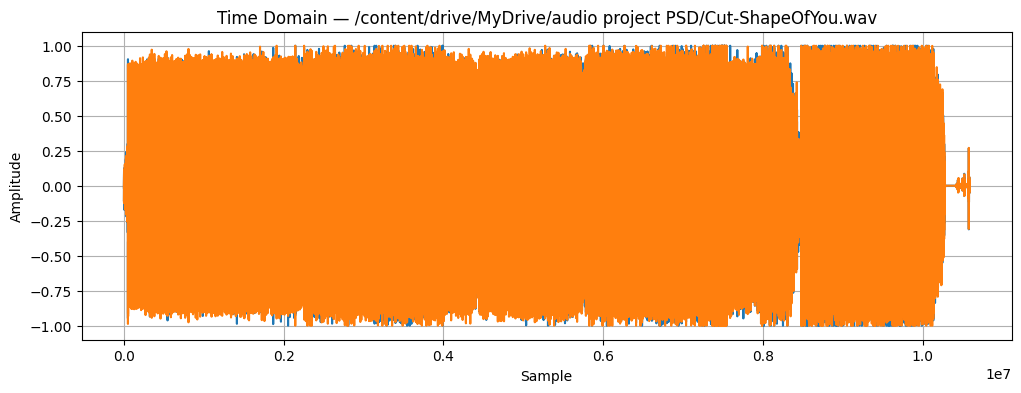

In [ ]:
plot_time(y, "Time Domain — /content/drive/MyDrive/audio project PSD/Cut-ShapeOfYou.wav")

BUTTERWORTH

FFT

In [ ]:
def plot_fft(signal, sr, title="FFT"):
    N = len(signal)
    f = rfftfreq(N, 1/sr)
    X = np.abs(rfft(signal))

    plt.figure(figsize=(12,4))
    plt.plot(f, X)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

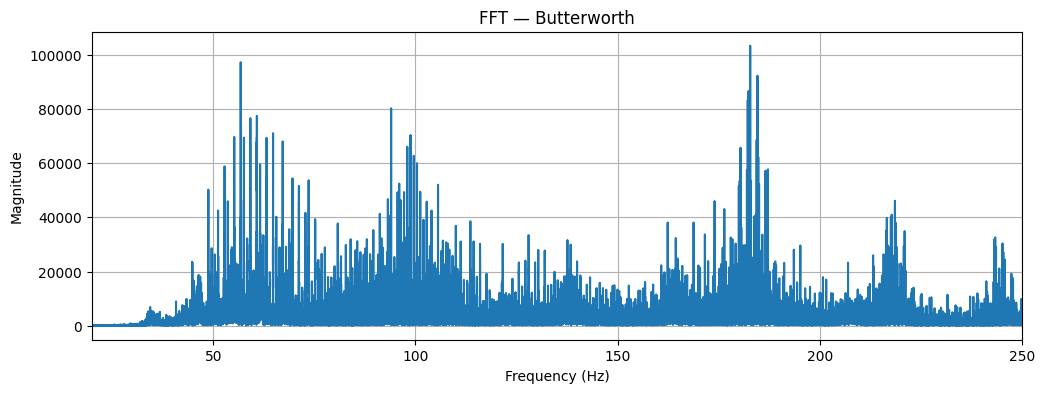

In [ ]:
plot_fft(y_butter[:, 0], sr, "FFT — Butterworth")

WELCH

In [ ]:
def plot_psd(signal, sr, title="PSD (Welch)"):
    f, Pxx = welch(signal, sr, nperseg=2048)

    plt.figure(figsize=(12,4))
    plt.semilogy(f, Pxx)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.show()

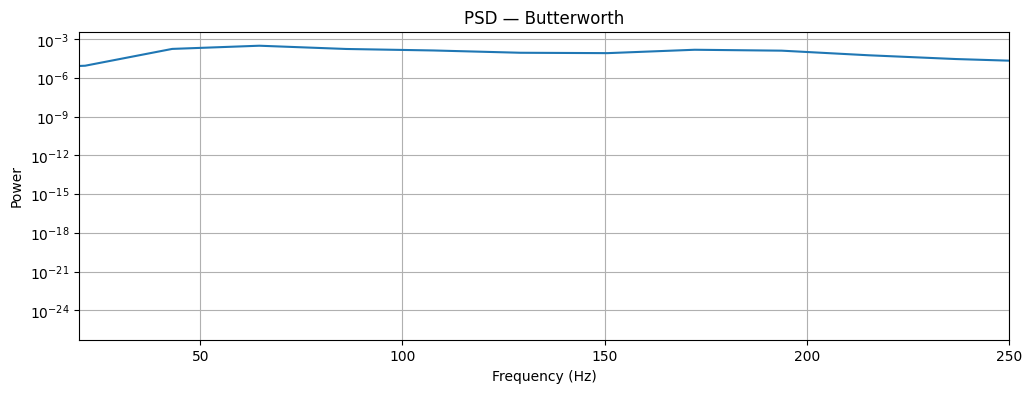

In [ ]:
plot_psd(y_butter[:, 0], sr, "PSD — Butterworth")

TIME DOMAIN

In [ ]:
def plot_time(signal, title="Time Domain"):
    plt.figure(figsize=(12,4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

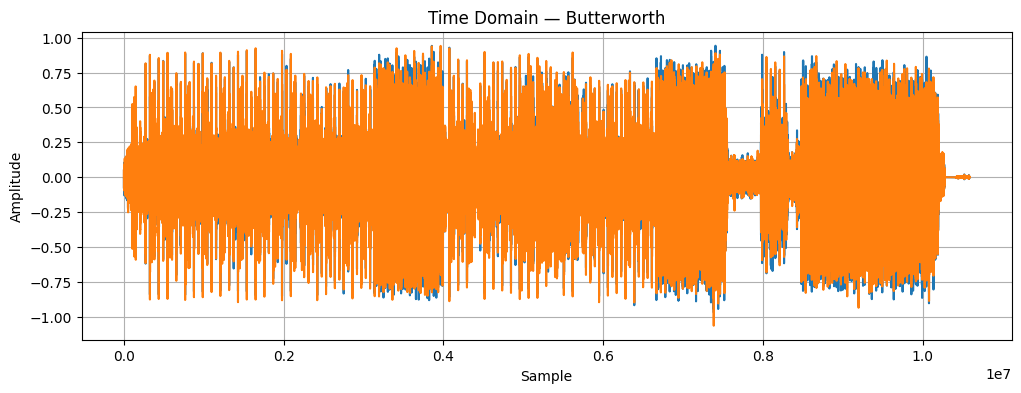

In [ ]:
plot_time(y_butter, "Time Domain — Butterworth")

FIR

FFT

In [ ]:
def plot_fft(signal, sr, title="FFT"):
    N = len(signal)
    f = rfftfreq(N, 1/sr)
    X = np.abs(rfft(signal))

    plt.figure(figsize=(12,4))
    plt.plot(f, X)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

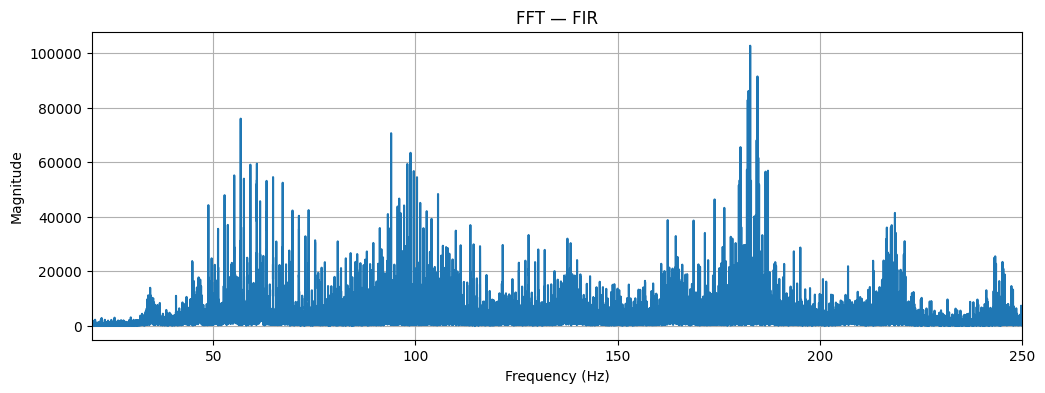

In [ ]:
plot_fft(y_fir[:, 0], sr, "FFT — FIR")

WELCH

In [ ]:
def plot_psd(signal, sr, title="PSD (Welch)"):
    f, Pxx = welch(signal, sr, nperseg=2048)

    plt.figure(figsize=(12,4))
    plt.semilogy(f, Pxx)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.show()

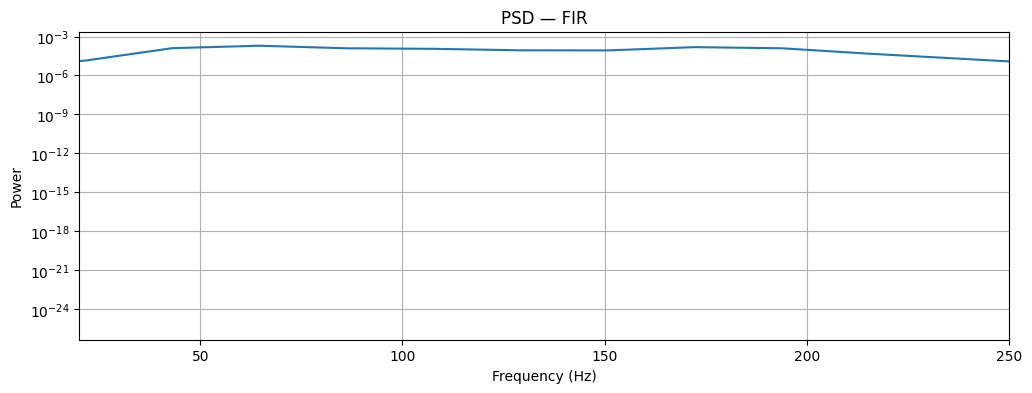

In [ ]:
plot_psd(y_fir[:, 0], sr, "PSD — FIR")

TIME DOMAIN

In [ ]:
def plot_time(signal, title="Time Domain"):
    plt.figure(figsize=(12,4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

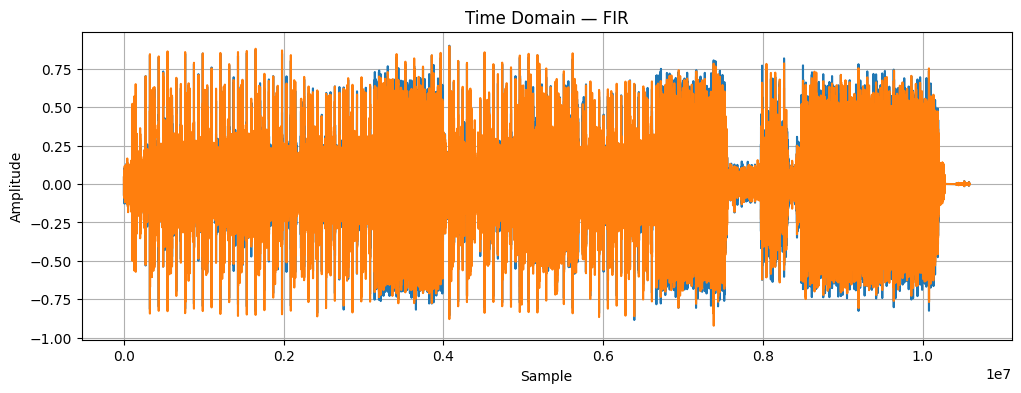

In [ ]:
plot_time(y_fir, "Time Domain — FIR")

CHEBYSHEV

FFT

In [ ]:
def plot_fft(signal, sr, title="FFT"):
    N = len(signal)
    f = rfftfreq(N, 1/sr)
    X = np.abs(rfft(signal))

    plt.figure(figsize=(12,4))
    plt.plot(f, X)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

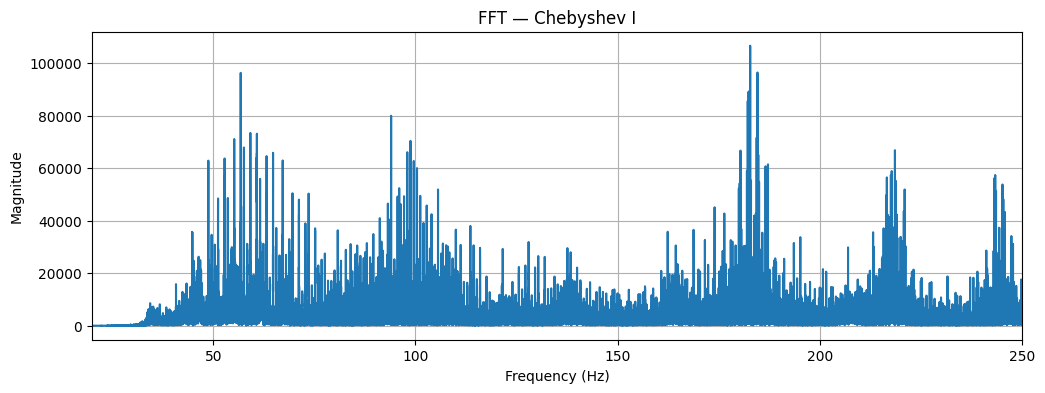

In [ ]:
plot_fft(y_cheb[:, 0], sr, "FFT — Chebyshev I")

WELCH

In [ ]:
def plot_psd(signal, sr, title="PSD (Welch)"):
    f, Pxx = welch(signal, sr, nperseg=2048)

    plt.figure(figsize=(12,4))
    plt.semilogy(f, Pxx)
    plt.xlim(20, 250)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power")
    plt.grid(True)
    plt.show()

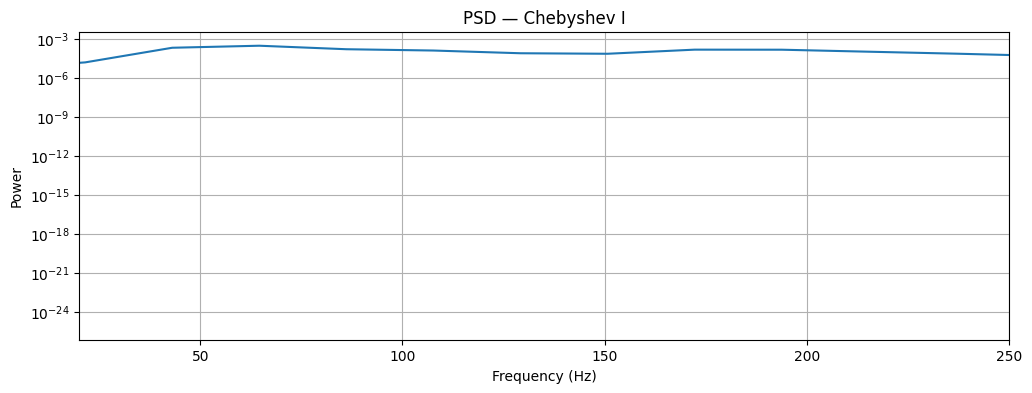

In [ ]:
plot_psd(y_cheb[:, 0], sr, "PSD — Chebyshev I")

TIME DOMAIN

In [ ]:
def plot_time(signal, title="Time Domain"):
    plt.figure(figsize=(12,4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

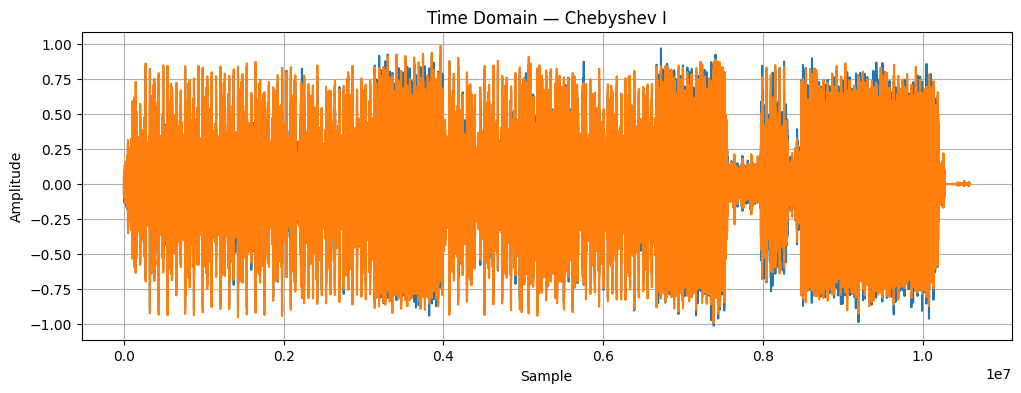

In [ ]:
plot_time(y_cheb, "Time Domain — Chebyshev I")

PENGGABUNGAN HASIL VISUALISASI

FFT

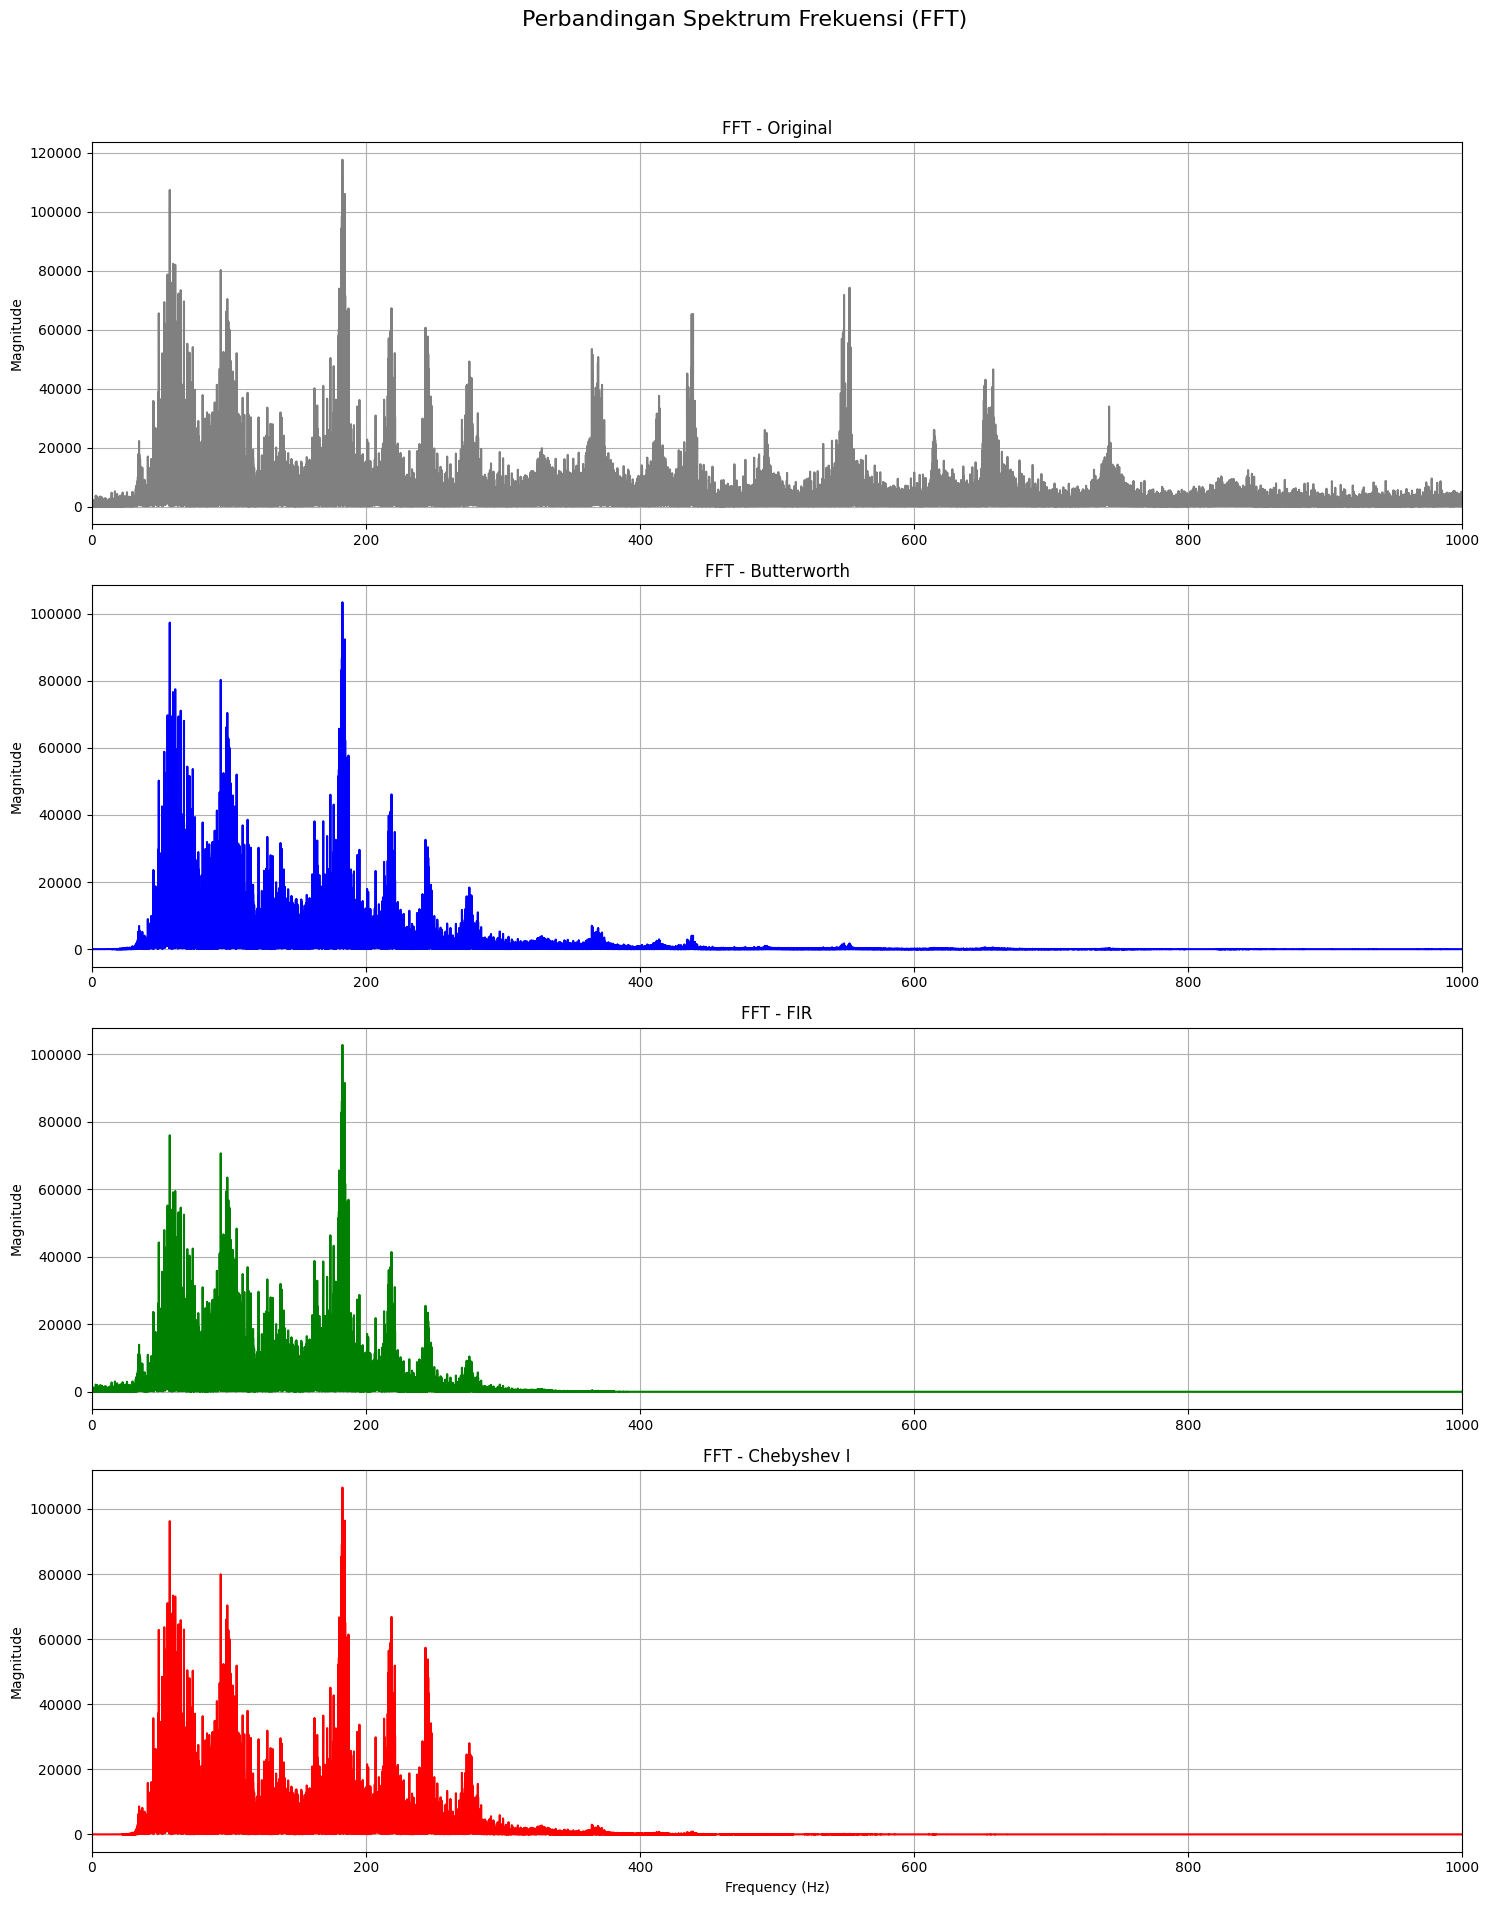

In [ ]:
import matplotlib.pyplot as plt

# data mono untuk setiap sinyal
signals = [y[:, 0], y_butter[:, 0], y_fir[:, 0], y_cheb[:, 0]]
labels = ["Original", "Butterworth", "FIR", "Chebyshev I"]
colors = ['gray', 'blue', 'green', 'red']

fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Perbandingan Spektrum Frekuensi (FFT)', fontsize=16)

for i, sig in enumerate(signals):
    N = len(sig)
    f = rfftfreq(N, 1/sr)
    X = np.abs(rfft(sig))

    axes[i].plot(f, X, color=colors[i])
    axes[i].set_title(f"FFT - {labels[i]}")
    axes[i].set_xlim(0, 1000)  # diperlebar agar terlihat bagian yang dipotong
    axes[i].set_ylabel("Magnitude")
    axes[i].grid(True)

plt.xlabel("Frequency (Hz)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

WELCH

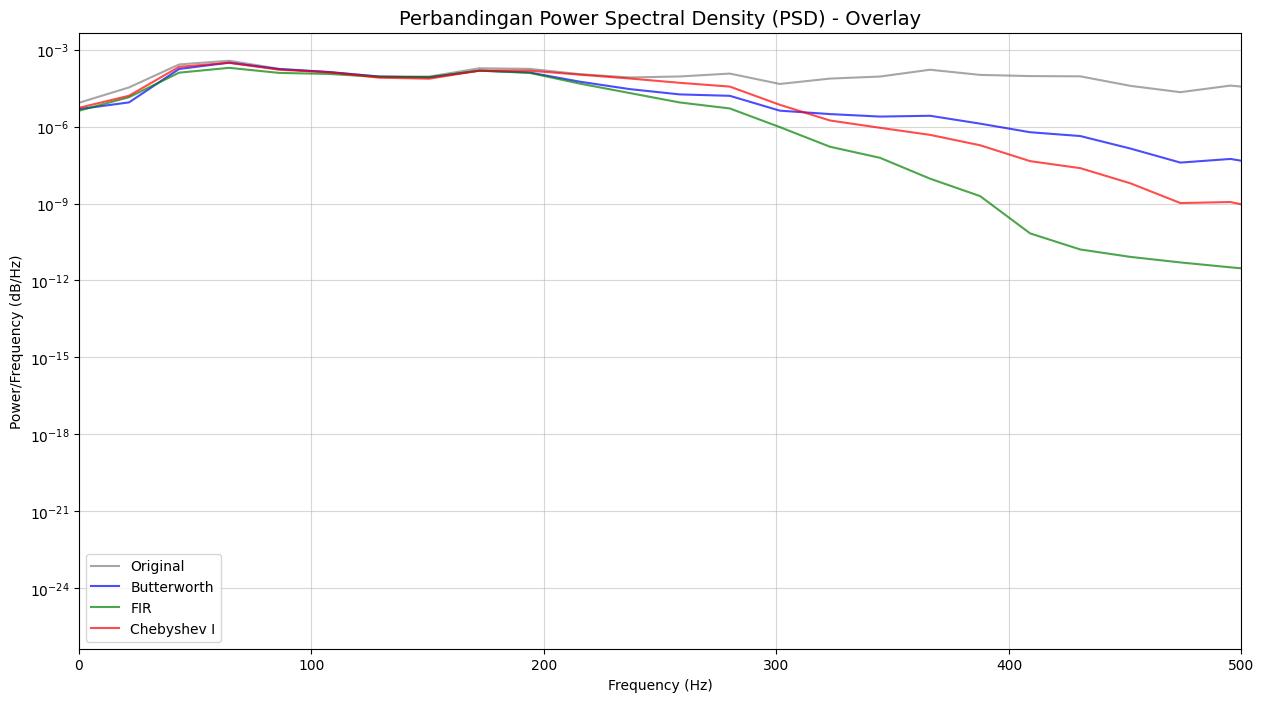

In [ ]:
from scipy.signal import welch

plt.figure(figsize=(15, 8))

for i, sig in enumerate(signals):
    f, Pxx = welch(sig, sr, nperseg=2048)
    plt.semilogy(f, Pxx, label=labels[i], color=colors[i], alpha=0.7)

plt.xlim(0, 500) # Fokus pada area transisi filter (40-250Hz)
plt.title("Perbandingan Power Spectral Density (PSD) - Overlay", fontsize=14)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

TIME DOMAIN

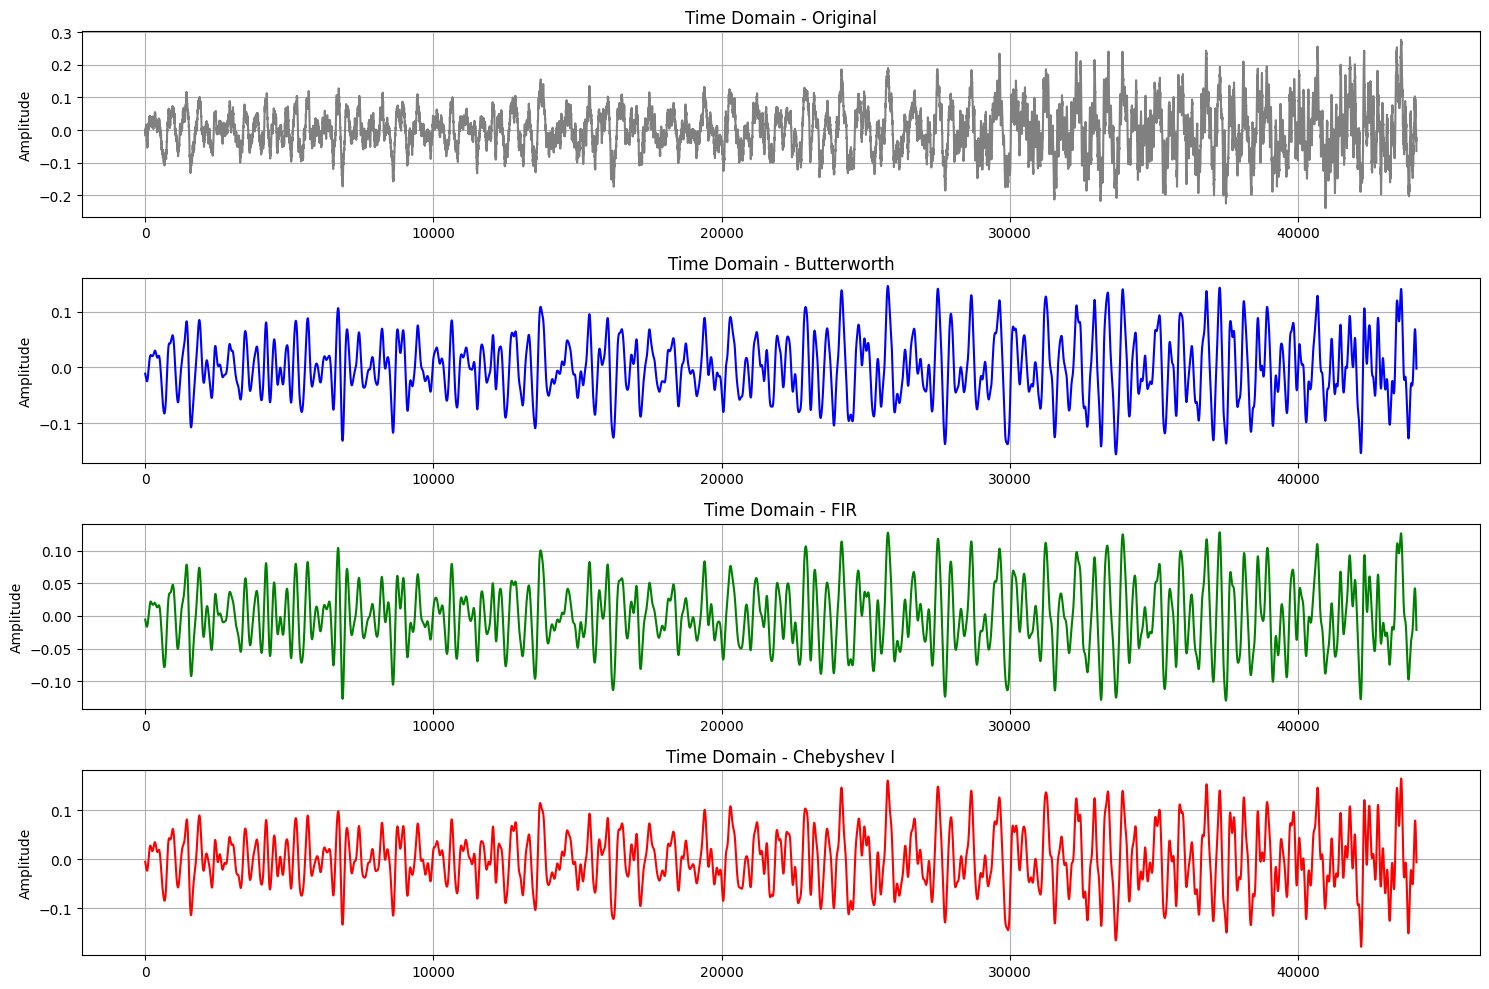

In [ ]:
plt.figure(figsize=(15, 10))

for i, sig in enumerate(signals):
    plt.subplot(4, 1, i+1)
    # Menampilkan potongan kecil (misal 1 detik pertama) agar gelombang terlihat jelas
    plt.plot(sig[:sr], color=colors[i])
    plt.title(f"Time Domain - {labels[i]}")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()

EKSTRAKSI SPEKTRAL

In [ ]:
import numpy as np
import librosa
import librosa.feature as lf
from scipy.signal import welch

In [ ]:
# RMS
def calc_rms(x):
    return np.sqrt(np.mean(x**2))
# SNR
def calc_snr(original, filtered):
    noise = original - filtered
    snr = 10 * np.log10(np.sum(original**2) / np.sum(noise**2))
    return snr
# Band Energy (20–250 Hz)
def band_energy(signal, sr, low=20, high=250):
    f, Pxx = welch(signal, sr, nperseg=2048)
    idx = np.logical_and(f >= low, f <= high)
    return np.trapz(Pxx[idx], f[idx])  # integrasi area power
# Spectral Centroid (Menggunakan librosa)
    centroid = np.mean(librosa.feature.spectral_centroid(y=sig, sr=sr))
# Spectral Rolloff
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=sig, sr=sr, roll_percent=0.85))
# PSD Peak Frequency
def psd_peak_freq(signal, sr):
    f, Pxx = welch(signal, sr, nperseg=2048)
    peak_idx = np.argmax(Pxx)
    return f[peak_idx]

In [ ]:
import pandas as pd

In [ ]:
butter_sig = y_butter[:, 0] if y_butter.ndim > 1 else y_butter
fir_sig    = y_fir[:, 0]    if y_fir.ndim > 1 else y_fir
cheb_sig   = y_cheb[:, 0]   if y_cheb.ndim > 1 else y_cheb


In [ ]:
features = {
    "Filter": ["Butterworth", "FIR", "Chebyshev I"],

    # RMS
    "RMS": [
        calc_rms(butter_sig),
        calc_rms(fir_sig),
        calc_rms(cheb_sig),
    ],

    # BAND ENERGY 20–250 Hz
    "Band Energy (20–250 Hz)": [
        band_energy(butter_sig, sr),
        band_energy(fir_sig, sr),
        band_energy(cheb_sig, sr),
    ],

    # PSD Peak Frequency
    "PSD Peak Freq (Hz)": [
        psd_peak_freq(butter_sig, sr),
        psd_peak_freq(fir_sig, sr),
        psd_peak_freq(cheb_sig, sr),
    ],

    # SNR (dibandingkan dengan original y[:,0])
    "SNR (dB)": [
        calc_snr(y[:,0], butter_sig),
        calc_snr(y[:,0], fir_sig),
        calc_snr(y[:,0], cheb_sig),
    ],

    # SPECTRAL CENTROID
    "Spectral Centroid (Hz)": [
        np.mean(librosa.feature.spectral_centroid(y=butter_sig, sr=sr)),
        np.mean(librosa.feature.spectral_centroid(y=fir_sig, sr=sr)),
        np.mean(librosa.feature.spectral_centroid(y=cheb_sig, sr=sr)),
    ],

    # SPECTRAL ROLLOFF
    "Spectral Rolloff (Hz)": [
        np.mean(librosa.feature.spectral_rolloff(y=butter_sig, sr=sr, roll_percent=0.85)),
        np.mean(librosa.feature.spectral_rolloff(y=fir_sig, sr=sr, roll_percent=0.85)),
        np.mean(librosa.feature.spectral_rolloff(y=cheb_sig, sr=sr, roll_percent=0.85)),
    ]
}

df_features = pd.DataFrame(features)
df_features

/tmp/ipython-input-1129283065.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[idx], f[idx])  # integrasi area power


,Filter,RMS,Band Energy (20–250 Hz),PSD Peak Freq (Hz),SNR (dB),Spectral Centroid (Hz),Spectral Rolloff (Hz)
0,Butterworth,0.173343,0.028549,64.599609,3.071365,178.232830,256.916155
1,FIR,0.154403,0.023131,64.599609,2.526756,149.664642,209.979980
2,Chebyshev I,0.184266,0.030821,64.599609,3.042575,167.099765,237.652730
